$\qquad$ $\qquad$$\qquad$  **TDA 232 / DIT 381: Home Assignment 4, part 1 - Image classification (20 points)** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Image classification using fully-connected and convolutional neural networks** <br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Emilio, Simon** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 26/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Yaxi Xie, 9604039207, yaxi@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Karl-Rehan Chiu Falck, 9411237499, falckk@student.chalmers.se** <br />


General guidelines:
* All solutions to theoretical and pratical problems must be submitted in this notebook, and equations should be formatted using LaTeX math-mode.
* For each exercise part, add cells containing the requested text, code or figures into this notebook.
* Your notebook should contain all required cell output, so that we don't have to execute the code. However, should we decide to, your notebook should run and reproduce the results up to stochastic variability. A good idea is to make sure it runs on Google Colab before submission.
* **Submit your solutions as notebook file (`.ipynb`) and in HTML format (`.html`).** To export this notebook to HTML format click `File` $\rightarrow$ `Download as` $\rightarrow$ `HTML`.

> **Note:** Training neural networks is computationally demanding and may take  time if you run it on your laptop. Running the code in Google Colab will likely be faster and you can even get access to a GPU.

> **Note:** To enable GPU hardware accelartion in Google Colab, click the `Change runtime type` field in the `runtime` drop-down menu, then choose `GPU` under hardware acceleration.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/simonpf/teaching/blob/master/machine_learning/2020/HW4a_2020.ipynb)

## Required software

For this assignment you will need to install the following Python packages:
- `pytorch`: Installation instructions can be found on the [pytorch homepage](https://pytorch.org/get-started/locally/) (pre-installed in Google Colab)
- `torchvision`: Typically installed with pytorch
- `catsndogs`: The data set we will be working with. To install it, run:

```
pip install catsndogs

```

> **Note:** In Google Colab you can install packages using   `!pip  <package_name>`

In [1]:
pip install catsndogs

Note: you may need to restart the kernel to use updated packages.


# Assignment 4, Part 1
# Theoretical exercises

## [Exercise 1: Backpropagation by hand, 1 point]

Consider the simple feed-forward neural network depicted in the figure below. This network
consists of an input layer $\mathbf{y}_0 = \mathbf{x}$ with 3 features,  one hidden layer
with activations $\mathbf{y}_1$ and a one-dimensional output layer with activations $\mathbf{y}_2$.

![Neural network illustration.](https://raw.githubusercontent.com/simonpf/teaching/master/machine_learning/2020/simple_nn.png)


The activations of a layer $i$ are computed by applying a linear transformation given by the weight matrix
$\mathbf{W}_i$ to the input activations $\mathbf{y}_{i - 1}$ producing the intermediate values $\mathbf{z}_i$:

$$
z_{i : j} = \sum_k W_{i:j, k} y_{i - 1:k} \\
$$

This is followed by the element-wise application of the layers'
activation function $f_i$ to the intermediate values $\mathbf{z}_i$:

$$
y_{i:j} = f_i (z_{i:j})
$$

> **Note:** The notation here uses '$:$' to separate layer from element indices. $W_{i:j,k}$ thus refers to the element in row $j$ and column $k$ in the weigth matrix $\mathbf{W}_i$ of the $i$th layer.


### 1, a)

Given the derivative of an error term $E$ with respect to the activation of the output neuron 
$\frac{dE}{dy_{2:0}}$, derive expressions for the derivatives of the error term with respect to the weights
$W_{i:j,k}$ and activations $y_{i:j}$ of the remaining layers of the network.

To simplify the results, you are encouraged to reuse derivatives you have already computeds in the expressions for the  downstream derivatives.

$$
\begin{align}
\frac{dE}{dW_{2:j, k}} = \: ? \\
\frac{dE}{dy_{1:j}} = \: ? \\
\frac{dE}{dW_{1:j, k}} = \: ? \\
\frac{dE}{dy_{0:j}} = \: ? \\
\end{align}
$$

If your calculations are correct, you should see that you can express the derivatives of the error function 
around a given layer in the network using the derivatives from the next higher layer. This yields a simple
recipe to successively compute the gradients in a feed forward neural network by starting at the last layer and
then computing the gradients layer-by-layer as you move backwards through the network. This method is commonly
referred to as **backpropagation**.

### My answer here:

####(1)

From the Chain Rule, we can get the result:
$$\frac{dE}{dW_{2:j, k}} = \frac{dE}{dy_{2:0}}\cdot\frac{dy_{2:0}}{dz_{2:j}}\cdot\frac{dz_{2:j}}{dW_{2:j, k}}$$

$\frac{dE}{dy_{2:0}}$ is known.

We know the activation function is:

$$
y_{i:j} = f_i (z_{i:j})
$$

$$\Rightarrow \frac{dy_{2:0}}{dz_{2:j}} = \frac{df_2(z_{2:j})}{dz_{2:j}}$$

We also have that:

$$
z_{i : j} = \sum_k W_{i:j, k} y_{i - 1:k} \\
$$

$$\Rightarrow z_{2 : j} = \sum_k W_{2:j, k} y_{1:k} \tag{1}$$

$$\Rightarrow \frac{dz_{2:j}}{dW_{2:j, k}} = y_{1:k} $$

$$\Rightarrow \frac{dE}{dW_{2:j, k}} = \frac{dE}{dy_{2:0}}\cdot\frac{df_2(z_{2:j})}{dz_{2:j}}\cdot y_{1:k} \tag{2} $$


#### (2)
$$\frac{dE}{dy_{1: j}} = \frac{dE}{dy_{2:0}}\cdot\frac{dy_{2:0}}{dz_{2:j}}\cdot\frac{dz_{2:j}}{dy_{1: j}}$$

Submitting the equation (1) to the derivation $\frac{dz_{2:j}}{dy_{1: j}}$:

$$\frac{dz_{2:j}}{dy_{1: j}} = {W_{2:j, j}}$$

$$\Rightarrow \frac{dE}{dy_{1: j}} = \frac{dE}{dy_{2:0}}\cdot\frac{df_2(z_{2:j})}{dz_{2:j}}\cdot {W_{2:j, j}}  \tag{3}$$


#### (3)
By using the Chain rule and the result from equation (2)
$$\frac{dE}{dW_{1:j, k}} = \frac{dE}{dy_{1:j}}\cdot\frac{dy_{1:j}}{dz_{1:j}}\cdot\frac{dz_{1:j}}{dW_{1:j, k}}$$

$\frac{dE}{dy_{1:j}}$ is achieved in (2).

$$\frac{dy_{1:j}}{dz_{1:j}} = \frac{df_1(z_{1:j})}{dz_{1:j}}$$

$$\frac{dz_{1:j}}{dW_{1:j, k}} = y_{0:k}$$

$$\Rightarrow \frac{dE}{dW_{1:j, k}} =\frac{dE}{dy_{1:j}}\cdot\frac{df_1(z_{1:j})}{dz_{1:j}}\cdot y_{0:k} \tag{4}$$


#### (4)
$$\frac{dE}{dy_{0: j}} = \frac{dE}{dy_{1:j}}\cdot\frac{dy_{1:j}}{dz_{1:j}}\cdot\frac{dz_{1:j}}{dy_{0: j}}$$

$$\frac{dz_{1:j}}{dy_{0: j}} = {W_{1:j, j}}$$

$$\Rightarrow \frac{dE}{dy_{1: j}} = \frac{dE}{dy_{1:j}}\cdot\frac{df_1(z_{1:j})}{dz_{1:j}}\cdot {W_{1:j, j}}  \tag{5}$$

## [Exercise 2: Loss function for binary classification, 1 point]

Assume that your task is to predict a binary class variable $Y \in \{0, 1\}$ conditional on some input $X$ using a neural network. To do so you want to train a network to predict the probability $p$ of a bernoulli distribution:

\begin{align}
P(Y | X) \sim \text{Bernoulli}(p = f(x)),
\end{align}

where $f$ represents the function to be learned by the neural network.

### 2, a)

Given independent pairs of samples $(x_1,  y_1), \ldots, (x_n, y_n)$ show that minimizing the binary cross entropy loss

\begin{align}
BCE = -\frac{1}{n}\sum_{i = 1}^n (1 - y)\ \log(1 - f(x)) + y\ \log(f(x))
\end{align}

maximizes the likelihood of the data.

> Hint: Note that the probability function of Bernoulli distributed variable $Y \sim \text{Bernoulli}(p)$ can be written $P(Y = y) = p^y\ (1- p)^{(1-y)}$


### My answer here:
For a binary class variable $Y \in \{0, 1\}$ conditional on some input $X$,since it is given independent pairs of samples $(x_1,  y_1), \ldots, (x_n, y_n)$, we can derive the likelihood as following:


$$
\begin{align}
p(Y|X) &= \prod_{n = 1}^{N}p(y_n|x_n) \\
& = \prod_{y_n = 0}p(y_n|x_n) \prod_{y_n = 1}p(y_n|x_n)
\end{align}
$$

It's given that $P(Y | X) \sim \text{Bernoulli}(p = f(x))$ and the probability function of Bernoulli distributed variable $Y \sim \text{Bernoulli}(p)$ can be written $P(Y = y) = p^y\ (1- p)^{(1-y)}$.

$$
\begin{align}
\Rightarrow
p(y|x) = f(x)^{y}(1-f(x))^{1-y}
\end{align}
$$

When $$y = 0, p(y|x) = 1-f(x)$$,
otherwise $$y = 1, p(y|x) = f(x)$$

To infer function $f$, we use MLE i.e. maximize the likelihood of the likelihood:

$$
\begin{align}
\max p(Y|X) &= \max \prod_{y_n = 0}p(y_n|x_n) \prod_{y_n = 1}p(y_n|x_n)\\
&=  \max \prod_{y_n = 0}(1-f(x)) \prod_{y_n = 1}f(x)\\
&\Leftrightarrow \max \sum_{y_n = 0}\log{(1-f(x))} + \sum_{y_n = 1}\log{f(x)}\\
&= \max \sum_{n = 1}^{N}y\log{f(x)} + (1-y)\log{(1-f(x))}\\
&= -\min \sum_{n = 1}^{N}y\log{f(x)} + (1-y)\log{(1-f(x))}\\
& \Leftrightarrow BCE
\end{align}
$$

In conclusion, minimize the  binary cross entropy loss

\begin{align}
BCE = -\frac{1}{n}\sum_{i = 1}^n (1 - y)\ \log(1 - f(x)) + y\ \log(f(x))
\end{align}

maximizes the likelihood of the data.

## [Exercise 3: Counting parameters in networks, 1 point]

### 3, a)
Imagine you apply a two layer fully connected network to a 28x28 rgb image. The hidden layer has dimension 256 and the output is of size 10. How many parameters are necessary? Include the bias parameters.

### My answer here:

For the fully-connected layer, all inputs units have a separable weight to each output unit. Thus for '$n$' inputs and '$m$' outputs, thenumber of weights is '$n\times m$'parameters. Additionally, for each output node, it has one bias, so '$(n+1)\times m$' parameters in total.

In this case, the input is $28\times 28\times 3$ dimension, so $n = 28\times 28\times 3$. For the hidden layer, it has dimension $256$, so $m = 256$. Thus in the hidden layer, the total parameters are:

$$(n+1)\times m = (28\times 28\times 3+1)\times 256 = 602368$$

For the output layer, it has dimension $10$, so $m = 10$. And the input is the output from pervious hidden layer, so $n = 256$. Thus in the hidden layer, the total parameters are:

$$(n+1)\times m = (256+1)\times 10 = 2570$$

In all, the total parameters including weights and biases are:

$$602368+2570 = 604938$$

### 3, b)

Apply the following network to the same image, how many parameters are needed? Include bias parameters. Show your calculations.

* Convolutional layer with 8 3x3 filters (stride 1).

* Max pooling layer (2x2) (stride 2).

* Convolutional layer with 16 3x3 filter (stride 1).

* Fully connected layer to ouput of size 10.

### My answer here:

For a convolutional layer which has '$l$' feature maps as input and '$k$' feature maps as output. The feature size is '$n\times m$'. Then we have '$(n\times m\times l+1)\times k$' parameters including biases.

* Convolutional layer with 8 3x3 filters (stride 1):
The input is $28\times 28\times 3$ dimension, so $l = 3$. The output has $k = 8$ map features. The filter size is $3\times 3$.

$$(n\times m\times l+1)\times k = (3\times 3 \times 3+1)\times 8 = 224$$

* Max pooling layer (2x2) (stride 2).
For the max pooling layer, it has no more parameters.

* Convolutional layer with 16 3x3 filter (stride 1).
The input should be the output from max pooling layer: $13\times13\times8$, so $l = 8$. $k = 16$. The filter size is $3\times3$.

$$(n\times m\times l+1)\times k = (3\times 3 \times 8+1)\times 16 = 1168$$

* Fully connected layer to ouput of size 10.
The input is $13\times13\times16$, and the output is $10\times1$. so for the fully-connected layer, $n = 13\times13\times16$, $m = 10$.

$$(n+1)\times m = (13\times13\times16+1)\times 10 = 27050$$

This brings the total number of parameters to:

224+1168+27050=28442

## [Excercise 4: Calculating output dimensions of a convolutional layer, 1 point]

Assume you apply a convolutional layer with 8 3x3 filters (stride 1) on a rgb 28x13 image. What will the dimensions of the output be (assuming no padding is done in the convolution)?

### My answer here:

Since the number of filters is $8$, so the depth of the output should be $d = 8$. And the filter size is $3\times3$ with no padding, so the height and width of the output should be $h = 28-2 = 26$ and $w = 13-2 = 11$. So the dimension of the output is :$h\times w\times d = 26 \times11\times8$.

## [Excercise 5: Applying a filter to an image, 1 point]

\begin{align}
\text{Image:} 
\begin{bmatrix}2 & 2 & 1 & 2 \\
               -2 & -2 & -1 & 1 \\
               1 & 1 & 2 & 1 \\
               1 & 1 & 3 & 1 
\end{bmatrix}
\ \ 
\text{Filter:}
\begin{bmatrix}1 & 1
\\-1 & -1
\end{bmatrix}
\end{align}

Convolve the filter over the image and apply ReLU, use a stride of 2 with a bias of -2. Try to give an explanation for the output, what is the filter detecting?

### My answer here:

The convolution of the filter over the image is :(the stride is 2)

\begin{align}
\begin{bmatrix}2\times1+2\times1+(-2)\times(-1)+(-2)\times(-1) = 8 & 1\times1+2\times1+(-1)\times(-1)+1\times(-1) = 3 \\
1\times1+1\times1+1\times(-1)+1\times(-1) = 0 & 2\times1+1\times1+3\times(-1)+1\times(-1) = -1 
\end{bmatrix}
\end{align}

Since the bias is -2:

\begin{align}
\begin{bmatrix}8-2 & 3-2 \\
0-2 &  -1-2
\end{bmatrix} 
\end{align}

\begin{align}
= \begin{bmatrix}6 & 1 \\
-2 &  -3 
\end{bmatrix}
\end{align}
And apply the Relu function: $f(x) = max(0,x)$:

\begin{align}
= \begin{bmatrix}6 & 1 \\
0 &  0 
\end{bmatrix}
\end{align}

For this task, we can see the image with the part of 
\begin{align}
\begin{bmatrix}2 & 2 \\
-2 &  -2 
\end{bmatrix}
\ \
\Rightarrow 6
\end{align} was assigned as the largest value and the parts of 

\begin{align}
\begin{bmatrix}1 & 1 \\
1 &  1 
\end{bmatrix}
\ \ 
\Rightarrow 0
\\
\begin{bmatrix}
2 & 1 \\
3 &1 
\end{bmatrix}
\ \
\Rightarrow 0
\end{align} were assigned with the value 0.

That is to say, the filter is detecting the horizontal edge of the image. It will assign large weights of the horizontal edge while set 0 to the other part.

# Practical exercises

In this practical exercise, you will develop a classification algorithm that predicts whether an image contains a cat or a dog. You wil do this using the `pytorch` deep learning framework.

## The data

The data that you will be using in this exercise consists of images of cats and dogs. The dataset is available through the `catsndogs` Python package. The package automatically downloads the data and provides access to the image files in the dataset.

In [2]:
from catsndogs.training import cats, dogs # The lists of cat and dog images.

Below, a few examples of the images in the dataset.

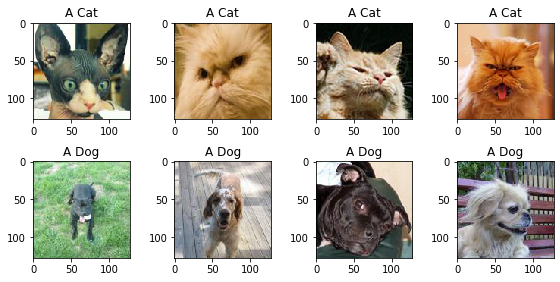

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

f, axs = plt.subplots(2, 4, figsize = (8, 4))
for i in range(4):
    img = np.random.choice(cats)
    ax = axs[0, i]
    ax.set_title("A Cat")
    ax.imshow(Image.open(img))
for i in range(4):
    img = np.random.choice(dogs)
    ax = axs[1, i]
    ax.set_title("A Dog")
    ax.imshow(Image.open(img))
plt.tight_layout()


## Getting started with pytorch

The following part provides a brief introduction to the fundamentals of `pytorch`.

### Why pytorch?

As most other popular deep learning frameworks, `pytorch` provides the following features:

- automatic differentiation,
- GPU support,
- flexible composition of neural network models,
- numerous pre-defined network components and optimization methods.

Pytorch strikes a good balance between flexibility, usability and performance, making it well suited for an introductory exercise as this one. There of course exist quite a few alternative frameworks, but the general concepts that you will learn in this exercise will apply also for them.

### Accessing documentation

Note that you can access source code documentation from inside the jupyter notebook using `?` and the `help` function. Documentation of the different torch modules can be found on the [pytorch home page](https://pytorch.org/docs/stable/index.html). 

In [4]:
import torch
#help(torch.tensor)

#### Tensors

Tensors are a fundamental concept of `pytorch`, as well as most other deep learning frameworks. A tensor  designates a collection of elements that are organized on a multi-dimensional grid. You may think of them as a generalization of vectors or matrices: The elements in a vector are organized along 1 dimension, whereas in a matrix they are organized along 2 dimensions.

A typical application of tensors is to hold images. As an example, we can load an image of a dog into a `torch.tensor`:

In [5]:
from torchvision.transforms.functional import to_tensor, to_pil_image
image_name = np.random.choice(dogs)
dog = to_tensor(Image.open(image_name))
#print("The size of 'dog' is:", type(dog))  
#dog = to_pil_image(dog)
#print("The size of 'dog' is:", type(dog)) 
print("The size of 'dog' is:", dog.size) 

The size of 'dog' is: <built-in method size of Tensor object at 0x000001D6C63DD138>


It becomes interesting when we start applying mathematical operations to tensors. For example we can compute the average of a cat and a dog. Note that all common mathematical operators (`+`, `-` `*`, `**`, ...) are defined on tensors.

Text(0.5, 1.0, 'A cat/dog average')

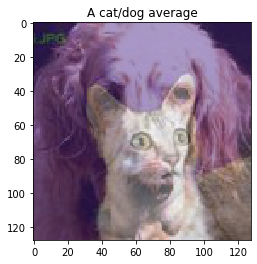

In [6]:
image_name = np.random.choice(cats)
cat = to_tensor(Image.open(image_name))
plt.imshow(to_pil_image(0.5 * (cat + dog)))
plt.title("A cat/dog average")

### Common tensor operations

There are many operations available on tensors and most of them follow the names used in `numpy`. In general, you can expect there to be an operation for most tasks at hand, so make sure you check the `pytorch` documentation search engine before you start cooking up something on your own.

#### Creation

In [7]:
import torch
ones = torch.ones(10, 10)
zeros = torch.zeros(10, 10)
rand = torch.randn(10, 10)

#### Mathematical operations

In [8]:
rand1 = torch.add(ones, rand)
p = torch.sigmoid(rand)
exp = torch.exp(rand)

#### Type conversions

As with `numpy.ndarray`s, the elements in a `torch.tensor` can have different data types. You can convert between different data types using the `to` member function.


In [9]:
print("The data type of p:", p.dtype)
p_short = p.to(torch.short)
print("The data type of p_short:", p_short.dtype)

The data type of p: torch.float32
The data type of p_short: torch.int16


For ML tasks you typically want to use [single-precision floating point numbers](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) (`torch.float32`). In general you will not have to worry too much about the data type, however, older versions of `pytorch` will throw errors when operations are performed on tensors with different numeric types.

In [10]:
p + p_short # Fails on older version of pytorch.

tensor([[0.1596, 0.2670, 0.6302, 0.3342, 0.6794, 0.4854, 0.5780, 0.4795, 0.6321,
         0.6507],
        [0.6449, 0.6142, 0.9077, 0.1612, 0.4096, 0.2190, 0.6852, 0.3923, 0.1634,
         0.5008],
        [0.5209, 0.5182, 0.5645, 0.7984, 0.5828, 0.3957, 0.8495, 0.4467, 0.2192,
         0.3616],
        [0.4627, 0.5958, 0.5686, 0.5838, 0.5458, 0.8183, 0.5782, 0.3662, 0.1512,
         0.3315],
        [0.4961, 0.4400, 0.5595, 0.8026, 0.4583, 0.8675, 0.6320, 0.5837, 0.8227,
         0.8492],
        [0.4296, 0.5050, 0.8346, 0.7010, 0.5418, 0.2951, 0.0657, 0.6673, 0.5917,
         0.3354],
        [0.8243, 0.4167, 0.6267, 0.8563, 0.8373, 0.7270, 0.5001, 0.6682, 0.3901,
         0.2965],
        [0.4083, 0.6288, 0.7301, 0.2432, 0.6863, 0.3226, 0.1060, 0.6092, 0.7518,
         0.2487],
        [0.7755, 0.9445, 0.5301, 0.5953, 0.3304, 0.7795, 0.3799, 0.4451, 0.5580,
         0.4485],
        [0.6317, 0.0893, 0.6142, 0.1652, 0.2696, 0.2328, 0.7213, 0.2374, 0.7577,
         0.7276]])

In [11]:
p2 = p + p_short.float() # short for p_double.to(torch.float32)
p2

tensor([[0.1596, 0.2670, 0.6302, 0.3342, 0.6794, 0.4854, 0.5780, 0.4795, 0.6321,
         0.6507],
        [0.6449, 0.6142, 0.9077, 0.1612, 0.4096, 0.2190, 0.6852, 0.3923, 0.1634,
         0.5008],
        [0.5209, 0.5182, 0.5645, 0.7984, 0.5828, 0.3957, 0.8495, 0.4467, 0.2192,
         0.3616],
        [0.4627, 0.5958, 0.5686, 0.5838, 0.5458, 0.8183, 0.5782, 0.3662, 0.1512,
         0.3315],
        [0.4961, 0.4400, 0.5595, 0.8026, 0.4583, 0.8675, 0.6320, 0.5837, 0.8227,
         0.8492],
        [0.4296, 0.5050, 0.8346, 0.7010, 0.5418, 0.2951, 0.0657, 0.6673, 0.5917,
         0.3354],
        [0.8243, 0.4167, 0.6267, 0.8563, 0.8373, 0.7270, 0.5001, 0.6682, 0.3901,
         0.2965],
        [0.4083, 0.6288, 0.7301, 0.2432, 0.6863, 0.3226, 0.1060, 0.6092, 0.7518,
         0.2487],
        [0.7755, 0.9445, 0.5301, 0.5953, 0.3304, 0.7795, 0.3799, 0.4451, 0.5580,
         0.4485],
        [0.6317, 0.0893, 0.6142, 0.1652, 0.2696, 0.2328, 0.7213, 0.2374, 0.7577,
         0.7276]])

#### Conversion from and to numpy arrays

numpy arrays can be converted directly to pytorch tensors using the `torch.tensor` function.

Converting `pytorch` tensors to numpy arrays can be done using the `numpy()` member function. If `pytorch` tracks the gradient of a tensor, then you will also need to call the `detach()` member function.

In [12]:
t_numpy = np.random.rand(2, 2)
t = torch.tensor(t_numpy)
print("Type of t:", type(t_numpy))
print("Type of t_pytorch:", type(t))
print("Type of t_pytorch.numpy():", type(t.numpy()))

Type of t: <class 'numpy.ndarray'>
Type of t_pytorch: <class 'torch.Tensor'>
Type of t_pytorch.numpy(): <class 'numpy.ndarray'>


In [13]:
t.requires_grad = True
#t.numpy() # Doesn't work
t.detach().numpy() # Works

array([[0.03716574, 0.61919457],
       [0.71535647, 0.0024187 ]])

### Automatic differentiation

One of the core strengths of pytorch is that it let's you copute complex mathematical operations on tensors and compute their derivatives. Remember, that this is an important part of training neural networks: In order to minimize the loss function using gradient descent, it is of course required to first compute the gradients. Luckily, `pytorch`'s `autograd` module can take care of all the complicated calculations that are required to compute the gradients of neural networks.

Computing gradients w.r.t to a given tensor involves the following steps:
1. Create a tensor and set the `requires_grad` attribute to `True`,
2. apply mathematical operations,
3. call the `backward()` function of the result tensor to compute the gradients.

> *Note:* Step 1 is not required for parameters of networks, whose gradients are computed by default when the model is in training mode.

As an example, take the following operation:

In [14]:
x = torch.linspace(-4, 4, 101, requires_grad=True)
y = torch.sigmoid(x)
z = y.sum()
z.backward()
dzdx = x.grad

Text(0, 0.5, 'y')

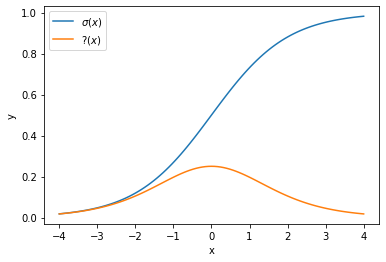

In [15]:
f, ax = plt.subplots(1, 1)
ax.plot(x.detach().numpy(),
        y.detach().numpy(),
        label = "$\sigma(x)$")
ax.plot(x.detach().numpy(),
        dzdx.numpy(),
        label = "$?(x)$")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

### [Exercise 1: Derivatives of activation functions, 1 point] 

Write down analytical expressions for the function $\sigma(x)$ and $?$ shown above.

$$\sigma(x) = sigmoid(x) = \frac{1}{1+e^{-x}}$$

$$z = \sum_{n = 1}^{N}{y_n} = \sum_{n = 1}^{N}{\frac{1}{1+e^{-x_n}}}$$

$$?(x) = \frac{dz}{dx} = \sum_{n = 1}^{N}\frac{d{\frac{1}{1+e^{-x_n}}}}{dx_n}$$

$$?(x) = \frac{d\frac{1}{1+e^{-x}}}{dx} = \frac{e^{-x}}{(1+e^{-x_n})^2} = \frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}}) = \sigma(x)(1-\sigma(x))$$


### GPU acceleration

Training complex networks is a computationally demanding task. To shorten training times, caluclations are typically performed on specialized hardware that was traditionally used to render 3D graphics on computers, so called graphic processing units (GPUs) or graphic cards . GPUs are in general more efficient in performing  highly-parallel computational tasks than CPUs, which are the chips that perform all 'standard' calculations in a PC. In `pytorch`, all oprations on tensors can be performed on a GPU using NVIDIA's CUDA computing platforms (https://en.wikipedia.org/wiki/CUDA).

The different processors that can be used for calculations, i.e. CPU or GPU, are represented in `pytorch` as devices. Each tensor has an associated device on which its data is located.
The default device is represented by `torch.device("cpu")`. By default, all calculations are executed on the CPU.  In order to be able to perform calculations on a tensor, you need to move its data to the GPU's memory.

In [16]:
# First check if CUDA is available.
print(torch.cuda.is_available())
cuda = torch.device("cuda")
cpu = torch.device("cpu")

False


Below, we will perform a quick demonstration of how much faster matrix multiplication becomes when executed on a  GPU.

In [17]:
W = torch.rand(512, 512)
def matmul_cpu():
    result = W
    for i in range(10):
        result = torch.matmul(W, result)
    return result
        
%time matmul_cpu()

Wall time: 22.9 ms


tensor([[6.4129e+23, 5.9963e+23, 6.2580e+23,  ..., 6.0956e+23, 6.4168e+23,
         6.2996e+23],
        [6.1829e+23, 5.7812e+23, 6.0335e+23,  ..., 5.8769e+23, 6.1866e+23,
         6.0736e+23],
        [6.3224e+23, 5.9116e+23, 6.1697e+23,  ..., 6.0095e+23, 6.3262e+23,
         6.2107e+23],
        ...,
        [6.2150e+23, 5.8112e+23, 6.0648e+23,  ..., 5.9074e+23, 6.2187e+23,
         6.1052e+23],
        [6.2553e+23, 5.8489e+23, 6.1042e+23,  ..., 5.9458e+23, 6.2590e+23,
         6.1448e+23],
        [6.3049e+23, 5.8953e+23, 6.1526e+23,  ..., 5.9929e+23, 6.3087e+23,
         6.1935e+23]])

In [18]:
#W_cuda = W.to(cuda)

#def matmul_gpu():
   # result = W_cuda
   # for i in range(10):
   #     result = torch.matmul(W_cuda, result)
   # return result
        
#matmul_gpu() # First time using GPU can incur some overhead.
#%time matmul_gpu()

The `%time` command displays CPU and Wall time for the execution of the two functions. The CPU time is split up in `user` time, which is the time spent executing only your code, and `sys` time, which is the time spent executing system kernel code required for example to load data from disk. Note that the CPU time is computed per core, so when your code runs on multiple cores the resulting CPU time is the sum of the time each core spends computing.

The wall time shows the total time that it took to execute the function. Since CPU time is calculated per core, the wall time can actually be lower than the CPU time for code that is executed on multiple CPUs in parallel.

To compare the absolute execution time for the two functions it is therefore most meaningful to compare the displayed wall times. As you should see from them, calculating the matrix power on the GPU is substantially faster than calculating it on the CPU.

## Loading the data

To train a network on the `catsndogs` dataset, we need to load the images into tensors. The `catsndogs.training` module has an attribute `folder`, which points to the root folder containing the training data. The root folder contains a `cat` and a `dog` folder which holds the images of cats and dogs, respectively.


Using the `torchvision.datasets.ImageFolder` class, data that is organized in a folder structure like this can be turned directly into a dataset for training ML algorithms. The dataset provides access to the images as input and as an integer representations of the class labels as output.

In [19]:
from catsndogs.training import folder
from torchvision.datasets import ImageFolder
from torchvision.transforms.functional import to_tensor, to_pil_image
images = ImageFolder(folder)
print("The size of image is:", type(images))

The size of image is: <class 'torchvision.datasets.folder.ImageFolder'>


You can load a sample from the training data by indexing the `images` object, which will return a tuple `(image, label)` containing the loaded image and corresponding label.

The type of image is: <class 'PIL.Image.Image'>
The label is: 0


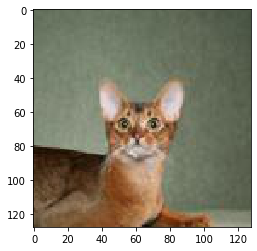

In [20]:
image, label = images[0]
plt.imshow(image)
print("The type of image is:", type(image))
print("The label is:", label)

However, as the code above shows, the type of the loaded image is a `PIL` image and not a tensor. To automatically transform the loaded image into a tensor, you can make use of the `transformation` parameter of the `ImageFolder` class.

The cell below adds a composition of two transforms to the dataset. The two transforms are applied sequentially to the image object that would otherwise be returned from the dataset. The first transform turns the image into a torch tensor and the second transform normalizes the image values so that they lie in the range $[-1, 1]$.

> Note: Input data that is not centered around zero can cause convergence problems during training, so it is usually a good idea to normalize input data to a range centered around 0.

In [21]:
from torchvision.transforms import Compose, ToTensor, Normalize
import numpy
transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images = ImageFolder(folder, transform=transform)
image, label = images[0]
print("Type of image is now:", type(image))

Type of image is now: <class 'torch.Tensor'>


In [22]:
# This function inverts the transformation of the input images. Tensor to image
def to_image(tensor):
    tensor = 0.5 * (tensor + 1.0)
    return to_pil_image(tensor)

For the training, we further split the data into training and validation set:

In [23]:
from  torch.utils.data import DataLoader
n_train = int(0.7 * len(images))
n_val = len(images) - n_train
training_data, validation_data = torch.utils.data.random_split(images, (n_train, n_val))
# Organize data into batches
training_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=True)

In [24]:
#x_0, y_0 = next(iter(images))
#x_1, y_1 = next(iter(training_loader))
#print("Shape of x_0:", x_0.size())
#print("Shape of x_1:", x_1.size())

In [25]:
print(type(training_data))

<class 'torch.utils.data.dataset.Subset'>


## [Exercise 2: Training a fully-connected network, 5 points]
## Defining a neural network model

Neural networks in `pytorch` are represented using the [`torch.nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class. The typical way to define a neural network model is to define a new class that inherits from the `Module` class.

### 2, a) (2 points)

Inspect the code given below and, using the documentation of the [`torch.nn`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) module, answer the following questions:
- What is the architecture of instances of the `FullyConnected` class?
#### My answer:
The architecture is as following :
- Fully connected Layer
- ReLU activation function
- Fully connected Layer
- ReLU activation function
- Fully connected Layer
- ReLU activation function
- Fully connected Layer 1 output




- What activations functions are applied in the hidden layers?
#### My answer:
ReLU activation function
- What activation function is used for the output?
#### My answer:
We don't apply an activation function to the network outputs.
- How are the parameters of the network initialized? Why is this important?
#### My answer:
It is defined by the input of '$input features$' which define the input dimensions and the '$width$' which define the hidden dimensions. And in this case, because the last layer defines the '$output size$' as 1. These parameters are important because they set the number of the parameters from the beginning, which decides the computation complexity of the training network.

In [26]:
from torch import nn

class FullyConnected(nn.Module):
    """
    Usually, this docstring should contain useful information about this
    class but this would make the exercise too easy.
    """
    def __init__(self,
                 input_features,
                 width):
        """
        Create a new mysterious network.
        """
        super().__init__()
        self.input_features = input_features
        self.fc_1 = nn.Linear(input_features, width)
        self.fc_2 = nn.Linear(width, width)
        self.fc_3 = nn.Linear(width, width)
        self.fc_4 = nn.Linear(width, 1)
        
    def forward(self, x):
        """
        The forward method required by nn.Module base class.
        """
        x = x.flatten(1, -1)
        x = self.fc_1(x)
        x = torch.relu(x)
        x = self.fc_2(x)
        x = torch.relu(x)
        x = self.fc_3(x)
        x = torch.relu(x)
        x = self.fc_4(x)
        
        return x  
    

## The training loop

In the cell below you find code for a typical training loop in `pytorch`. 

### 2, b) (1 point)

Look at the function below. Most of the actual training functionality is abstracted away in the arguments provided to the function. For each of the arguments, describe what tasks the corresponding object has to perform so that this method can be used to train a neural network.

#### My answer:

The main idea of the function '$train epoch$' is: firstly, training the given network model for one epoch of the training set; secondly, calculating the loss function of the predicted label and the true one; then using the idea of $gradient$ $descent$ to optimize the loss i.e., updating the parameters (weights and biases) of the network; finally evaluate the current network performance by testing on the validation set. In all, this function performs one step of the iteration of training and checks the validation.  For each of the input arguments, the tasks it has to perform are as following:

- $training loader$: In this case, we shuffle the whole training set and divide it into mini-batches of size $32$. Then randomly choosing one of the mini-batch for each iteration.

- $validation loader$: Similar to the $training loader$. Providing the iterable batched validation data.

- $model$: The network we have designed before. It uses the input of images to provide a predicted label $y_{pred}$, which will then be used to compare with the true one to get the loss.

- $loss$: Loss function to minimize. Typically, we can use the cross-entropy loss. And we can use $backward$ to calculate the partial derivative.

- $optimizer$: Optimizer to use to optimize loss. Typically, we can use a gradient descent optimizer like $SGD$, $ADAM$ or $RMS prop$.

- $device$: The torch device on which to run the calculations, like $CPU$ or $CUDA$.



In [27]:
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a useful docstring, but that would
    give away the answer for the exercise.
    """
    
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n = len(training_loader)
    
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        l.backward()
        optimizer.step()
        
        training_loss += l.item()
        print("Batch ({} / {}): Loss {:.2f}".format(i, n, l.item()), end="\r")
        
    training_loss /= n
        
    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        
        validation_loss += l.item()
    
    validation_loss /= n
    model.to(torch.device("cpu"))
    
    return (training_loss, validation_loss)

## The optimizer object

In the code above the optimization method was hidden in the `optimizer` object. To understand how to write a suitable optimizer, you first need to understand a bit more about the role of `Module` objects in `pytorch`. The `torch.nn.Module` class is the base class for all neural networks and the components that make up neural networks. Module objects typically have trainable parameters. These trainable parameters of a module can be accessed via its `parameters()` member function. When a module contains attributes that are themselves `Module` instances, then  the `parameters()` function of the containing module will automatically list the trainable parameters of its `Module` attributes.

In order to  train a network, the optimizer needs to be aware of the module's parameters. In `pytorch` an optimizer object therefore always needs to be instantiated with a list of parameters that should be trained. In addition to that, an optimizer typically provides a function to set the gradients of the module parameters to zero. This is because gradients in pytorch are accumulated between consecutive calls to the `backward()` function.
This makes it necessary to set the gradients to zero between two training iterations.

### 2, c)  (0.5 points)

Complete the code below so that the `step` method of the `SGD` class performs gradient descent on the provided list of parameters.

> **Hint 1:** The `parameters()` member function returns a list of tensors representing the weight matrices and bias vectors in a network. Given a tensor `p`, you can access its gradients using the `p.grad` attribute.

> **Hint 2:** Because of the way `pytorch`'s autograd function works, changing the  value of a parameter `p` has to be done using its `p.data` attribute:

```
p.data = ...
```

In [28]:
class GradientDescent():
    """
    A gradient descent optimizer.
    """
    def __init__(self,
                 parameters,
                 learning_rate):
        """
        Create a gradient descent optimizer.
        
        Arguments:
            parameters: Iterable providing the parameters to optimize.
            learning_rate: The learning rate to use for optimization.
        """
        self.parameters = list(parameters)
        self.learning_rate = learning_rate
        
    def zero_grad(self):
        for p in self.parameters:
            if not p.grad is None:
                p.grad.zero_()
      
        
    def step(self):
        """
        Perform a gradient descent step on parameters associated to this optimizer.
        """
        for p in self.parameters:
            p.data -= self.learning_rate * p.grad
            

## Training the network

With the optimizer, the model and the training loop in place we are close to being able to start training the network, however a few details remain to be sorted out.

The `training_data` and `validation_data` object defined above can be used to iterate over the data, but only on a per sample basis. For the training a neural network, however, we typically want to iterate through the data in batches. To take care of this , `pytorch` provides the `DataLoader` class, which can be used to batch and shuffle existing data:

In [29]:
from  torch.utils.data import DataLoader
training_loader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=True)


Next, we need to choose a suitable training loss to minimize.

### 2, d) (0.5 points)

Choose a suitable loss function from the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module and assign an instance of it to the loss variable in the code cell below

> **Hint:** Note that in the `train_epoch` function defined above loss function is applied **directly** to the output of the network. In your choice of the loss function you thus need to consider the output activation of the network.

In [30]:
loss = nn.BCEWithLogitsLoss()

Finally, we choose the device to run the training on. If available, you should use a GPU because it will be substantially faster.


In [31]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

### 1, e) (1 point)

Train the neural network for at least 10 epochs, then reduce the learning rate and continue training for at least another ten epochs. Plot the resulting training and validation losses. Was the training successful?

#### My answer:
The traning is not that succssful. And there seems to be no change with different learning rate. Although the training loss is low but the validation loss is still large, which may be because the model is overfitting now.

Epoch 1: Validation loss = 0.6471844187804631
Epoch 2: Validation loss = 0.625705178294863
Epoch 3: Validation loss = 0.6179838499852589
Epoch 4: Validation loss = 0.6101882649319512
Epoch 5: Validation loss = 0.6010297515562603
Epoch 6: Validation loss = 0.5911932012864521
Epoch 7: Validation loss = 0.5810789561697415
Epoch 8: Validation loss = 0.5717734811561448
Epoch 9: Validation loss = 0.5597023325307029
Epoch 10: Validation loss = 0.5517854009355817
Epoch 11: Validation loss = 0.5403062807662147
Epoch 12: Validation loss = 0.5371409761054176
Epoch 13: Validation loss = 0.5275582979832377
Epoch 14: Validation loss = 0.5219661263482911
Epoch 15: Validation loss = 0.5174405734453883
Epoch 16: Validation loss = 0.5109448294554438
Epoch 17: Validation loss = 0.514653494315488
Epoch 18: Validation loss = 0.522295393049717
Epoch 19: Validation loss = 0.5100376233458519
Epoch 20: Validation loss = 0.5268943437508175


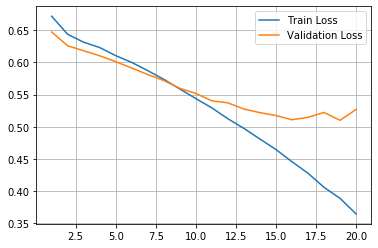

In [32]:
#  main 
traininglosses = []
validationlosses = []
fc = FullyConnected(input_features=3*128 * 128, width = 512)
optimizer =  GradientDescent(fc.parameters(), learning_rate = 0.005)
for j in range(10):
    tl_lr, vl_lr = train_epoch(training_loader, validation_loader, fc, loss, optimizer, device)
    traininglosses.append(tl_lr)
    validationlosses.append(vl_lr)
    print("Epoch {}: Validation loss = {}".format(j + 1, vl_lr))


# Reduce the learning rate
optimizer =  GradientDescent(fc.parameters(), learning_rate = 0.004)
for i in range(10):
    tl_lr, vl_lr = train_epoch(training_loader, validation_loader, fc, loss, optimizer, device)
    traininglosses.append(tl_lr)
    validationlosses.append(vl_lr)
    print("Epoch {}: Validation loss = {}".format(i +j + 2, vl_lr))    
    
    
#  Plot the resulting training and validation losses
from matplotlib import pyplot as plt
import numpy as np
totalsteps = np.linspace(1, i+j+2, i+j+2)
plt.plot(totalsteps, traininglosses, label='Train Loss')
plt.plot(totalsteps, validationlosses, label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

## [Exercise 3: Training on augmented training data, 3 points]

If you trained the model long enough, you should see that the model overfits on the training data, which 
causes the generalization error to increase.  This is not surprising considering that the training set is rather small. A technique to counteract overfitting is to augment the training data by artificially increasing the size of the training data set. In this case we will use random transforms that mimic the effect of perspective or changes in lighting to the images.

### 3, a) (1 point)

Create an augmented training data set by adding suitable transforms from the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) module to the transformations that are applied when
the images are loaded. Suitable transforms to consider are `RandomAffine` and `ColorJitter`.

> **Hint**: Applying these transforms of course only makes sense for the training data and not the validation
 data. To ensure that this is the case do not create new `training_data` and `validation_data` objects but instead overwrite the `training_data.dataset` attribute of the existing `training_data` object, as shown below. (This is a bit hacky, but the easiest way to achieve this in the current context.)
 

In [33]:
from torchvision.transforms import RandomAffine,ColorJitter,Compose, ToTensor, Normalize
from numpy import int
transform = Compose([RandomAffine(degrees = 5, translate=(0,0.2), scale= None, shear=None, resample=False, fillcolor=0),
                     ColorJitter(brightness= (0,5), contrast=(0,10)),
                     ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

images_augmented = ImageFolder(folder, transform=transform)# Define augmented data

n_train = int(0.7 * len(images_augmented))
dataset_augmented, not_important = torch.utils.data.random_split(images_augmented, (n_train,len(images_augmented) - n_train))
training_data.dataset = dataset_augmented


In [34]:
from  torch.utils.data import DataLoader
training_loader = DataLoader(training_data.dataset, batch_size=32, shuffle=True)

Let's look at a preview of the augmented training data.

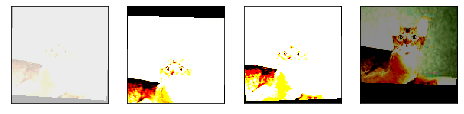

In [35]:
f, axs = plt.subplots(1, 4, figsize=(8, 2))
for i in range(4):
    ax = axs[i]
    ax.imshow(to_image(images_augmented[0][0]))
    ax.set_xticks([])
    ax.set_yticks([])

### 3, b) (1 point)

Train the fully-connected model once again on the augmented training data. You should achieve a validation loss lower than 0.6. Plot training and validation loss.

In [36]:
from torch import nn

class FullyConnected(nn.Module):
    """
    Usually, this docstring should contain useful information about this
    class but this would make the exercise too easy.
    """
    def __init__(self,
                 input_features,
                 width):
        """
        Create a new mysterious network.
        """
        super().__init__()
        self.input_features = input_features
        self.fc_1 = nn.Linear(input_features, width)
        self.fc_2 = nn.Linear(width, width)
        self.fc_3 = nn.Linear(width, width)
        self.fc_4 = nn.Linear(width, 1)
        
    def forward(self, x):
        """
        The forward method required by nn.Module base class.
        """
        x = x.flatten(1, -1)
        x = self.fc_1(x)
        x = torch.relu(x)
        x = self.fc_2(x)
        x = torch.relu(x)
        x = self.fc_3(x)
        x = torch.relu(x)
        x = self.fc_4(x)
        
        return x  
    

Epoch 1: Validation loss = 0.6544590166636876
Epoch 2: Validation loss = 0.6376912828002658
Epoch 3: Validation loss = 0.6268280659403119
Epoch 4: Validation loss = 0.6221756381647927
Epoch 5: Validation loss = 0.6153630358832223
Epoch 6: Validation loss = 0.6101826003619603
Epoch 7: Validation loss = 0.6036758763449532
Epoch 8: Validation loss = 0.6129463272435325
Epoch 9: Validation loss = 0.6052013103451047
Epoch 10: Validation loss = 0.600673816033772
Epoch 11: Validation loss = 0.5983200115816933
Epoch 12: Validation loss = 0.5925942276205335
Epoch 13: Validation loss = 0.5898973835366113
Epoch 14: Validation loss = 0.5826724341937474
Epoch 15: Validation loss = 0.5851545929908752
Epoch 16: Validation loss = 0.5805586214576449
Epoch 17: Validation loss = 0.5708268540246146
Epoch 18: Validation loss = 0.5663759303944451
Epoch 19: Validation loss = 0.5703057859625135
Epoch 20: Validation loss = 0.5623242887003082
Epoch 21: Validation loss = 0.5664054059556553
Epoch 22: Validation lo

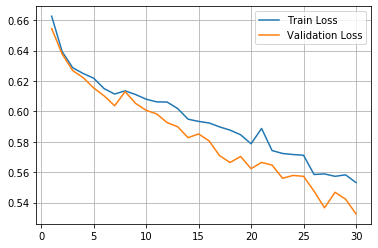

In [37]:
#  main 
traininglosses = []
validationlosses = []
fc = FullyConnected(input_features=3*128 * 128, width = 512)
optimizer =  GradientDescent(fc.parameters(), learning_rate = 0.005)

for i in range(30):
    tl_lr, vl_lr = train_epoch(training_loader, validation_loader, fc, loss, optimizer, device)
    traininglosses.append(tl_lr)
    validationlosses.append( vl_lr)
    print("Epoch {}: Validation loss = {}".format(i + 1, vl_lr))
    
#  Plot the resulting training and validation losses
from matplotlib import pyplot as plt
import numpy as np
totalsteps = np.linspace(1, i+1, i+1)
plt.plot(totalsteps, traininglosses, label='Train Loss')
plt.plot(totalsteps, validationlosses, label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

### 3, c) (1 point)

A useful performance metric for binary classification tasks  is the [receiver operating characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). Complete the code below and write a function that computes the true positive and false positive rate for varying values of the discrimination threshold $p \in [0, 1]$. Then, using the code below, plot the ROC. What is the significance of the line black, dashed line?

### My answer:

The line black, dashed line means the random chance. If the curve is above the diagonal line, it means better classifier and vice versa. The perfect classifier is the (0,1) points. X = 0 means no false positives, and Y = 1 means no false negatives (all positives are true positives); that is to say, no matter the classifier output is positive or negative, it is 100% correct.

In [38]:
 def ROC(prob, label, thres):
    OneBatchSize = len(prob)
    
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(OneBatchSize):
        Temp = prob[i]
        if Temp >= thres:
            Temp = 1
        if Temp == 1:
            if label[i] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if label[i] == 0:
                TN += 1
            else:
                FN += 1
    
    accracy = float(TP+FP) / float(OneBatchSize)
    if TP+FP == 0:
        precision = 0
    else:
        precision = float(TP) / float(TP+FP)
    TPR = float(TP) / float(TP+FN)
    FPR = float(FP) / float(FP+TN)
    
    return accracy, precision, TPR, FPR

In [39]:
 def receiver_operating_characteristic(model,
                                      validation_loader,
                                      ps):

    # Computes receiver operating characteristic for given model and
    # validation data.
    
    # Arguments:
       # model: The pytorch model to evaluate.
        #validation_loader: torch DataLoader to use to iterate over validation data.
        #ps: Iterable containing the values of the discrimination threshold in
           #increasing order.
    # Returns:
        #(fpr, tpr): Tuple containing the false positive rates (fpr) and the true
        # positive rates as numpy.ndarrays.
    
    # Choose one item in the validation_loader
    
    for index, (image, label) in enumerate(validation_loader):
        # Move input to device
        image = image.to(device)
        label = label.to(device)
    
    # Predict 
    y_pred = model(image)
    y_pred = y_pred.squeeze(dim = -1)
    Func = nn.Sigmoid()
    prob = Func(y_pred)
       
    # Transform from Tensor to numpy
    prob = prob.detach().numpy()# the probability of the prediction is correct label
    label = label.numpy()

    threshold_num = len(ps)
    accracy_array = np.zeros(threshold_num)
    precision_array = np.zeros(threshold_num)
    TPR_array = np.zeros(threshold_num)
    FPR_array = np.zeros(threshold_num)

    # calculate all the rates
    for thres in range(threshold_num):
        accracy, precision, TPR, FPR = ROC( prob, label, ps[thres])
        accracy_array[thres] = accracy
        precision_array[thres] = precision
        TPR_array[thres] = TPR
        FPR_array[thres] = FPR
        
    return FPR_array,TPR_array

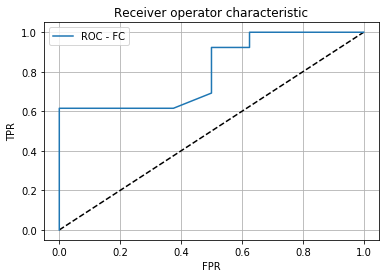

In [62]:
#import pdb
#pdb.set_trace()
fpr, tpr = receiver_operating_characteristic(fc, validation_loader, np.linspace(0, 1, 101))
#print(fpr,tpr)

# Plot ROC curve
x = np.linspace(0, 1, 101)
f, ax = plt.subplots(1, 1)
ax.plot(x, x, c="k", ls="--")
ax.plot(fpr, tpr,label='ROC - FC')
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.set_title("Receiver operator characteristic")
plt.legend()
plt.grid()
plt.show()

Finally, let's look at the prediction for samples from the validation set. On average, your model should get more images right than wrong.

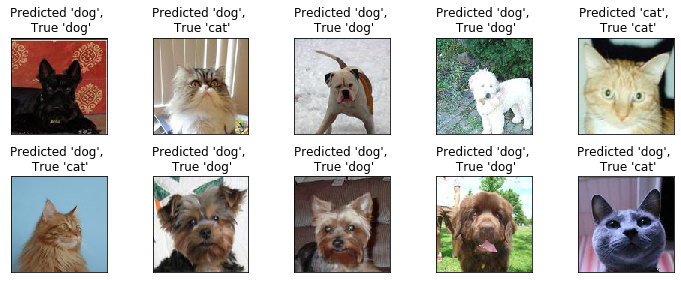

In [41]:
def index_to_pet(index):
    
    if index == 0:
        return "cat"
    else:
        return "dog"
    
def plot_results(model, validation_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):

        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
        
plot_results(fc, validation_data)

## [Exercise 4: Training a convolutional  neural network, 4 points]

### 4, a) (2 points)

Define and train a convolutional network with the following architecture:
- 2D conv. layer: $32$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $4 \times 4$, stride 4
- 2D conv. layer: $64$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- 2D conv. layer: $128$ filters, kernel size $3 \times 3$, stride 1
- ReLU activation function
- Max pooling: kernel size $2 \times 2$, stride 2
- Fully connected: 512 neurons
- ReLU activation function
- Fully connected: 512 neurons
    
With this architecture, you should achive a validation loss below $0.3$. 

> **Hint:** You can find all necessary components to implement the convolutional network in the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module.

### My answer:

 Because we design a binary classification here so the output should be just one neuron. To achieve this, we add two layer of ReLu layer and Fully connected layer with 512 inputs and 1 outputs. And by setting the learning rate as 0.08, we can get a validation loss below  0.3 with this CNN network.

In [42]:
cnn = nn.Sequential(nn.Conv2d(3, 32, 5),      # 126*126
                    nn.ReLU(),
                    nn.MaxPool2d(4, 4),       # 31*31
                    nn.Conv2d(32, 64, 5),     # 29*29
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2),       # 14 x 14
                    nn.Conv2d(64, 128, 3),    # 12 x 12
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2),       # 6 x 6
                    nn.Flatten(1, -1),        # 36
                    nn.Linear(3200, 512),
                    nn.ReLU(),
                    nn.Linear(512, 512),
                    nn.ReLU(),
                    nn.Linear(512, 1))

Epoch 1: Validation loss = 0.6240963382380349
Epoch 2: Validation loss = 0.6053681927067893
Epoch 3: Validation loss = 0.6110266063894544
Epoch 4: Validation loss = 0.6122457427637917
Epoch 5: Validation loss = 0.6233334690332413
Epoch 6: Validation loss = 0.5904465849910464
Epoch 7: Validation loss = 0.6010309968675885
Epoch 8: Validation loss = 0.5333356601851327
Epoch 9: Validation loss = 0.5927015542984009
Epoch 10: Validation loss = 0.4655426772577422
Epoch 11: Validation loss = 0.4194145266498838
Epoch 12: Validation loss = 0.4208970559494836
Epoch 13: Validation loss = 0.4268580302596092
Epoch 14: Validation loss = 0.46011400542088915
Epoch 15: Validation loss = 0.36821194738149643
Epoch 16: Validation loss = 0.4313488783580916
Epoch 17: Validation loss = 0.40821293209280285
Epoch 18: Validation loss = 0.36366534924932886
Epoch 19: Validation loss = 0.36717796006373
Epoch 20: Validation loss = 0.36213065470967976
Epoch 21: Validation loss = 0.32115017463053974
Epoch 22: Validati

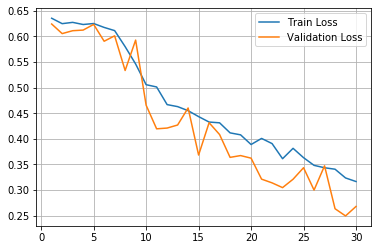

In [43]:
#  main 
traininglosses = []
validationlosses = []

loss = nn.BCEWithLogitsLoss()
optimizer = GradientDescent(cnn.parameters(),learning_rate = 0.08)#or 0.08

for i in range(30):
    tl_lr, vl_lr = train_epoch(training_loader, validation_loader, cnn, loss, optimizer, device)
    traininglosses.append(tl_lr)
    validationlosses.append(vl_lr)
    print("Epoch {}: Validation loss = {}".format(i + 1, vl_lr))

    
#  Plot the resulting training and validation losses
from matplotlib import pyplot as plt
import numpy as np
totalsteps = np.linspace(1, i+1, i+1)
plt.plot(totalsteps, traininglosses, label='Train Loss')
plt.plot(totalsteps, validationlosses, label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

### 4, a)  (2 points)

Tune the network architecture and training routin to achieve a validation error lower than 0.15 on the validation set. Some things you may want to try:
- Increasing the complexity of your network (more layers, filters or neurons)
- A learning rate schedule
- Checkpoints or early stopping

### My answer:
In this task ,we try these three approches to improve the model. First, increasing the complexity of the network: increasing more layers of the BatchNorm2d and BatchNorm1d before each of the Relu layer to accelerate neural network training and convergence speed and improve the stability of the network.

Furthermore, we introduce a very sample 'learning rate schedule' by updating the learning rate each epoch to get faster and better to the optimal solution. We do this by the factor of '$decay = \frac{lr}{epoch}$', where $lr$ is the learning rate. And update the new learning rate by:

$$lr = \frac{lr}{1 + decay \times epoch}$$


Last, we add the part of early stopping to avoid overfitting on the training dataset. Early stopping keeps the track of the validation loss, if the loss stops decreasing for several epochs, the training stops automatically. 

By combining there three methods together, we can finally achieve a validation error lower than 0.15 on the validation set.


#### Reference:
The EarlyStopping Class is introduced by the https://github.com/Bjarten/early-stopping-pytorch/blob/master/pytorchtools.py

In [67]:
cnn = nn.Sequential(nn.Conv2d(3, 32, 5),      # 126*126
                    nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                    nn.ReLU(),
                    nn.MaxPool2d(4, 4),       # 31*31
                    nn.Conv2d(32, 64, 5),     # 29*29
                    nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2),       # 14 x 14
                    nn.Conv2d(64, 128, 3),    # 12 x 12
                    nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2),       # 6 x 6
                    nn.Flatten(1, -1),        # 36
                    nn.Linear(3200, 512),
                    nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                    nn.ReLU(),
                    nn.Linear(512, 512),
                    nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
                    nn.ReLU(),
                    nn.Linear(512, 1))

In [68]:
import numpy as np
import torch

class EarlyStopping():
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            pass#print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

Epoch 1: Validation loss = 0.5933849321944373
Epoch 2: Validation loss = 0.5612724380833762
Epoch 3: Validation loss = 0.506688787468842
Epoch 4: Validation loss = 0.5150214210152626
EarlyStopping counter: 1 out of 8
Epoch 5: Validation loss = 0.38017301953264643
Epoch 6: Validation loss = 0.342502343335322
Epoch 7: Validation loss = 0.3445831297763756
EarlyStopping counter: 1 out of 8
Epoch 8: Validation loss = 0.3922440548028265
EarlyStopping counter: 2 out of 8
Epoch 9: Validation loss = 0.29603531903454233
Epoch 10: Validation loss = 0.32292797576103893
EarlyStopping counter: 1 out of 8
Epoch 11: Validation loss = 0.45629341687474934
EarlyStopping counter: 2 out of 8
Epoch 12: Validation loss = 0.29582891293934416
Epoch 13: Validation loss = 0.3143357128969261
EarlyStopping counter: 1 out of 8
Epoch 14: Validation loss = 0.28745404205151964
Epoch 15: Validation loss = 0.2819310538470745
Epoch 16: Validation loss = 0.2686269309903894
Epoch 17: Validation loss = 0.27534854997481617
E

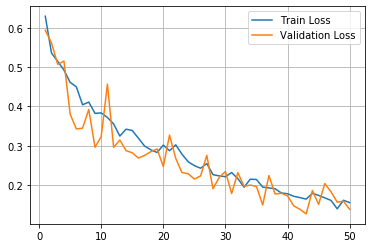

In [69]:
#  main 
traininglosses = []
validationlosses = []
loss = nn.BCEWithLogitsLoss()
early_stopping = EarlyStopping(patience=8, verbose=True)   
lr = 0.05;

for i in range(50):
    optimizer = GradientDescent(cnn.parameters(),learning_rate = lr)
    tl_lr, vl_lr = train_epoch(training_loader, validation_loader, cnn, loss, optimizer, device)
    traininglosses.append(tl_lr)
    validationlosses.append(vl_lr)
    print("Epoch {}: Validation loss = {}".format(i + 1, vl_lr))

    early_stopping(vl_lr, cnn)
    
    if early_stopping.early_stop:
        print("Early stopping")
        break
    
    # Introduce a learning - rate decay
    epoch = i+1
    decay = lr/epoch
    lr = lr * 1/(1 + decay * epoch)
    
#  Plot the resulting training and validation losses
from matplotlib import pyplot as plt
import numpy as np
totalsteps = np.linspace(1, i+1, i+1)
plt.plot(totalsteps, traininglosses, label='Train Loss')
plt.plot(totalsteps, validationlosses, label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

## [Exercise 5: Evaluation on test set, 2 points]

Now evaluate the performance of the fully-connected neural network to your best convolutional neural network on the `catsndogs` test data, which is available in `catsndogs.test` module.

- Plot ROC curves for both the fully-connected and the convolutional model.
- Compute the accuracy of each model for a discimination threshold p = 0.5
- Provide a plot of 8 images from the test set together with the prediction from the convolutional model.

In [70]:
from catsndogs.test import folder
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Compose, Normalize
from torch.utils.data import DataLoader, random_split

transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images = ImageFolder(folder, transform=transform)


n_test = int(0.3*len(images))
n_rest = len(images)-n_test
test_data , rest = torch.utils.data.random_split(images, (n_test,n_rest))
# Organize data into batches
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

<class 'torch.utils.data.dataset.Subset'>


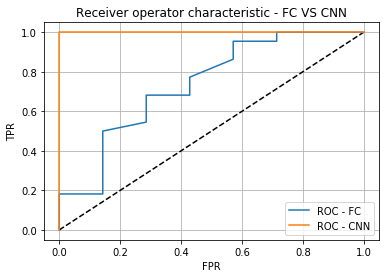

In [82]:
# 1.Plot ROC curves for both the fully-connected and the convolutional model.
fpr_fc, tpr_fc = receiver_operating_characteristic(fc, test_loader, np.linspace(0, 1, 101))
fpr_cnn, tpr_cnn = receiver_operating_characteristic(cnn, test_loader, np.linspace(0, 1, 101))

# Plot ROC curve
x = np.linspace(0, 1, 101)
f, ax = plt.subplots(1, 1)
ax.plot(x, x, c="k", ls="--")
ax.plot(fpr_fc, tpr_fc, label='ROC - FC')
ax.plot(fpr_cnn, tpr_cnn, label='ROC - CNN')
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.set_title("Receiver operator characteristic - FC VS CNN")
plt.legend()
plt.grid()
plt.show()

In [75]:
# 2.Compute the accuracy of each model for a discimination threshold p = 0.5
def receiver_operating_characteristic_acc(model,
                                          test_loader,
                                          ps):
    
    for index, (image, label) in enumerate(test_loader):
        # Move input to device
        image = image.to(device)
        label = label.to(device)
    
    # Predict 
    y_pred = model(image)
    y_pred = y_pred.squeeze(dim = -1)
    Func = nn.Sigmoid()
    prob = Func(y_pred)
       
    # Transform from Tensor to numpy
    prob = prob.detach().numpy()# the probability of the prediction is correct label
    label = label.numpy()

    threshold_num = len(ps)
    accracy_array = np.zeros(threshold_num)
    precision_array = np.zeros(threshold_num)
    TPR_array = np.zeros(threshold_num)
    FPR_array = np.zeros(threshold_num)

    # calculate all the rates
    accracy, precision, TPR, FPR = ROC( prob, label, ps[50]) # ps[50] = 0.5
    
    return accracy



accracy_halfthres_fc = receiver_operating_characteristic_acc(fc, test_loader, np.linspace(0, 1, 101))
accracy_halfthres_cnn = receiver_operating_characteristic_acc(cnn, test_loader, np.linspace(0, 1, 101))
print("Accuracy of model FC for threshold p = 0.5 :")
print(accracy_halfthres_fc)
print("Accuracy of model CNN for threshold p = 0.5 :")
print(accracy_halfthres_cnn)

Accuracy of model FC for threshold p = 0.5 :
0.8275862068965517
Accuracy of model CNN for threshold p = 0.5 :
0.7241379310344828


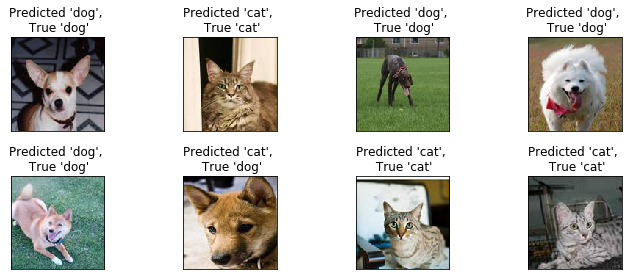

In [77]:
# 3.Provide a plot of 8 images from the test set together with the prediction from the convolutional model.
def index_to_pet(index):
    
    if index == 0:
        return "cat"
    else:
        return "dog"
    
def plot_results(model, test_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 4, figsize=(10, 4))
    for i in range(8):

        # Make prediction on random test sample
        index = np.random.randint(len(test_data))
        x, y = test_data[index]

        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5  # add one dimension to the first one
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([]) 
    
    plt.tight_layout()
        
plot_results(cnn, test_data)

From the predicted and the true label, we can see that only one of them is wrong. Thus our training network performs well.

## [Exercise 6 (Bonus*): Your algorithm in the wild, 2 points]

Acquire an image of a cat or dog resize it to size $128 \times 128$ pixels and apply your model to it. Present your results. Does it work?


*: This is bonus exercise and will give you two point that can make up for a point lost somewhere in the assignment.